# <span style="color:blue">  Numerical exercises 7</span> Igor Vasiljevic 11191A

## Tail correlation are values of U/N and P beyond the cut-off

## The Initial condition for each state are in the file "input.solid","input.liquid" and "input.gas"

## Note that with python script the autocorrelation calculation is slow

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(x):
    """Compute autocorrelation"""
    mean = np.mean(x)
    var = np.var(x)
    xp = x - mean
    correlation = np.correlate(xp, xp, mode='full')[-len(x):]
    autocorrelation = correlation / (var * len(x))
    return autocorrelation

def block_averages(x, block_size):
    """Compute block averages of a 1-D array."""
    n_blocks = len(x) // block_size
    x_blocks = x[:n_blocks * block_size].reshape((n_blocks, block_size))
    block_averages = np.mean(x_blocks, axis=1)
    return block_averages

block_sizes = np.arange(10, 5001, 10)

## Solid

In [116]:
dataSolidInst=pd.read_csv('../Esercizio7/output_epot_Instat_Solid.dat', delimiter='\s+', header=None, names=['U/N','g', 'error'])

In [117]:
un_values = dataSolidInst["U/N"].values
# Compute autocorrelation
acf = autocorrelation(un_values)

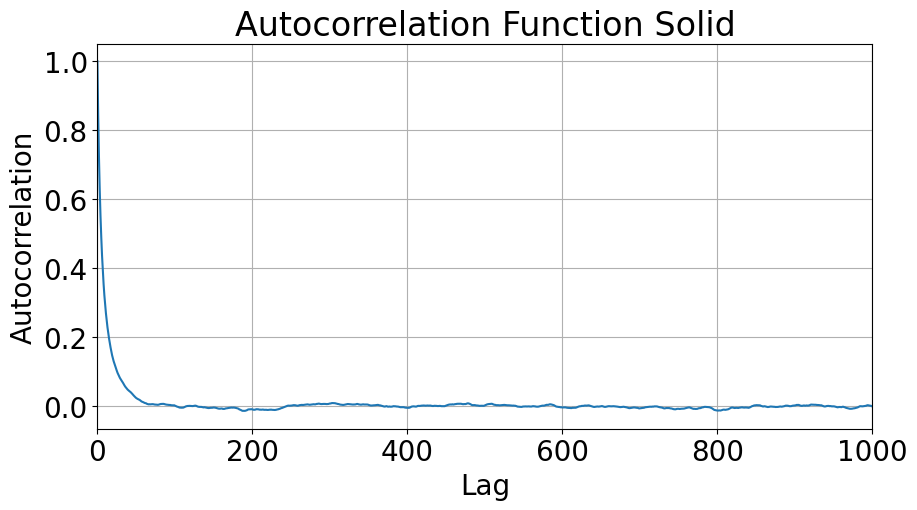

In [128]:
# Plot autocorrelation function
plt.plot(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function Solid')
plt.xlim(0,1000)
plt.grid(True)
plt.show()

## In case of Solid the block size should be around 100 step

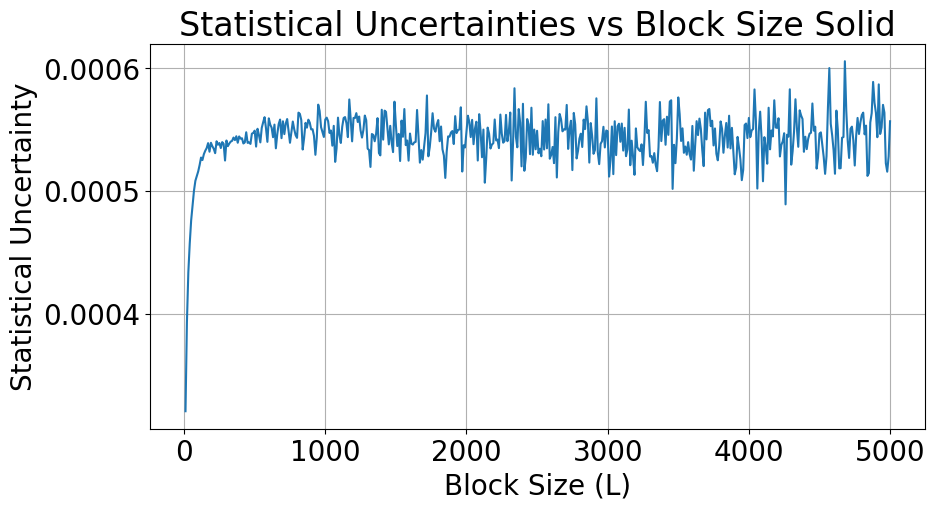

In [129]:
# Compute statistical uncertainties for each block size
uncertainties = []
for block_size in block_sizes:
    block_averages_data = block_averages(un_values, block_size)
    uncertainty = np.std(block_averages_data) / np.sqrt(len(block_averages_data))
    uncertainties.append(uncertainty)

# Plot statistical uncertainties as a function of block size
plt.plot(block_sizes, uncertainties)
plt.xlabel('Block Size (L)')
plt.ylabel('Statistical Uncertainty')
plt.title('Statistical Uncertainties vs Block Size Solid')
plt.grid(True)
plt.show()

##  Liquid

In [120]:
dataLiquidInst=pd.read_csv('../Esercizio7/output_epot_Instat_Liquid.dat', delimiter='\s+', header=None, names=['U/N','g', 'error'])

In [121]:
un_values2 = dataLiquidInst["U/N"].values  # Extract the values from the "U/N" column
# Compute autocorrelation
acf2 = autocorrelation(un_values2)

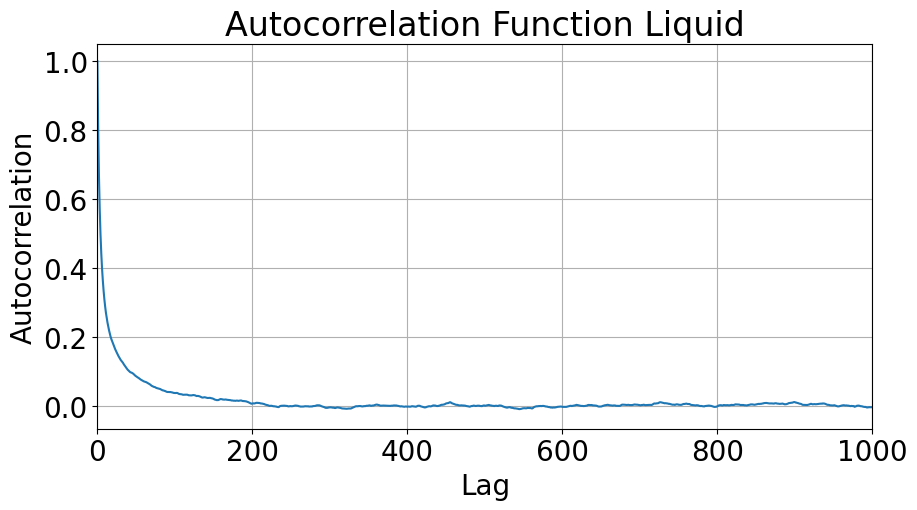

In [130]:
# Plot autocorrelation function
plt.plot(acf2)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function Liquid')
plt.xlim(0,1000)
plt.grid(True)
plt.show()

## In case of Liquid the block size should be around 250 step

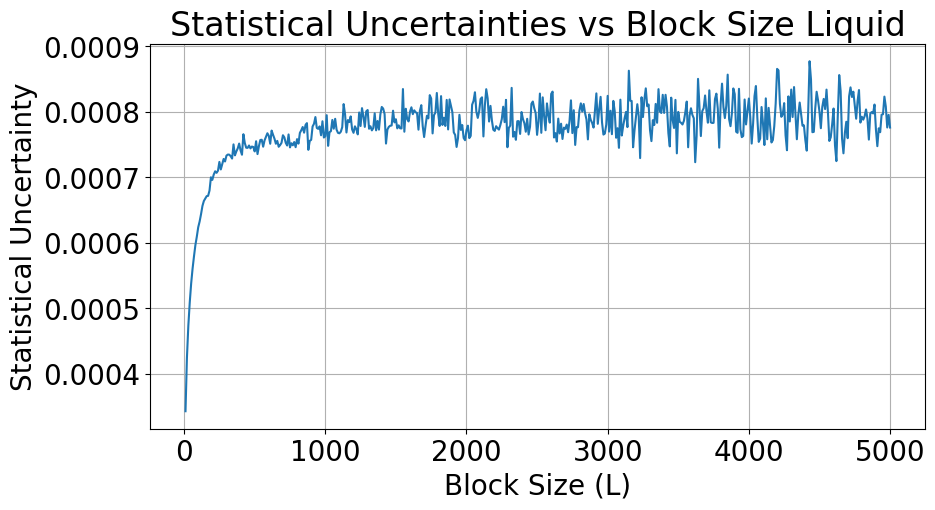

In [131]:
# Vary block sizes from L=M/N=10 to L=5e3
block_sizes = np.arange(10, 5001, 10)

# Compute statistical uncertainties for each block size
uncertainties = []
for block_size in block_sizes:
    block_averages_data = block_averages(un_values2, block_size)
    uncertainty = np.std(block_averages_data) / np.sqrt(len(block_averages_data))
    uncertainties.append(uncertainty)

# Plot statistical uncertainties as a function of block size
plt.plot(block_sizes, uncertainties)
plt.xlabel('Block Size (L)')
plt.ylabel('Statistical Uncertainty')
plt.title('Statistical Uncertainties vs Block Size Liquid')
plt.grid(True)
plt.show()

## Gas

In [124]:
dataGasInst=pd.read_csv('../Esercizio7/output_epot_Instat_Gas.dat', delimiter='\s+', header=None, names=['U/N','g', 'error'])

In [125]:
un_values3 = dataGasInst["U/N"].values  # Extract the values from the "U/N" column
# Compute autocorrelation
acf3 = autocorrelation(un_values3)

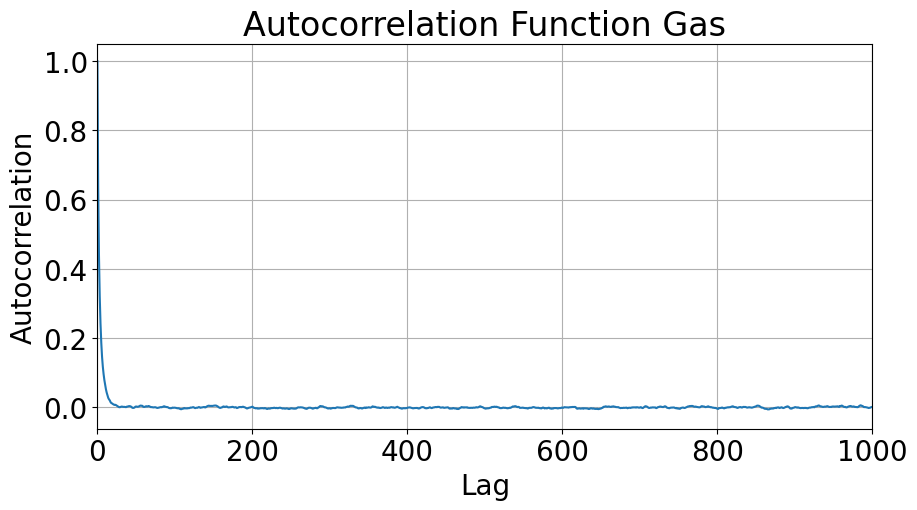

In [132]:
# Plot autocorrelation function
plt.plot(acf3)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function Gas')
plt.xlim(0,1000)
plt.grid(True)
plt.show()

## In case of Gas the block size should be around 50 step

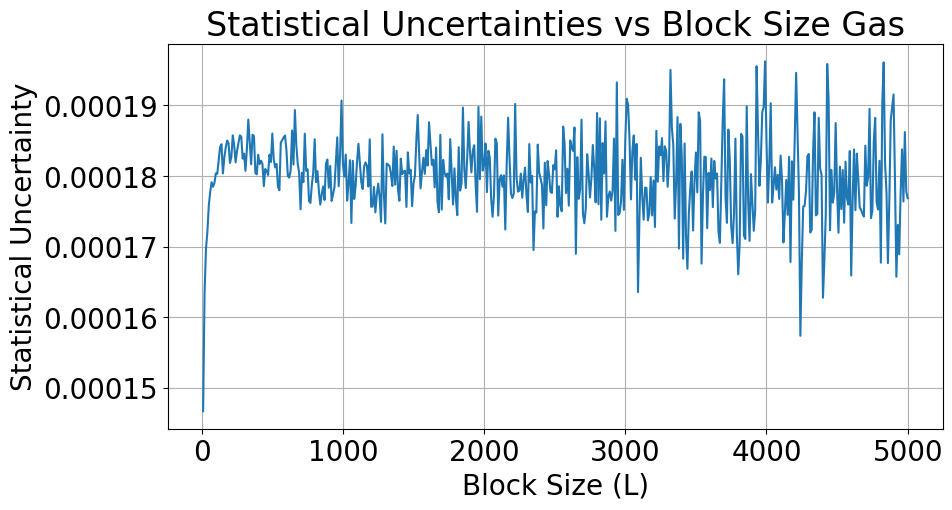

In [133]:
# Compute statistical uncertainties for each block size
uncertainties = []
for block_size in block_sizes:
    block_averages_data = block_averages(un_values3, block_size)
    uncertainty = np.std(block_averages_data) / np.sqrt(len(block_averages_data))
    uncertainties.append(uncertainty)

# Plot statistical uncertainties as a function of block size
plt.plot(block_sizes, uncertainties)
plt.xlabel('Block Size (L)')
plt.ylabel('Statistical Uncertainty')
plt.title('Statistical Uncertainties vs Block Size Gas')
plt.grid(True)
plt.show()

## After the block size becomes large enough from the perspective of the data blocking technique, you would typically observe that the statistical uncertainties reach a plateau or stabilize at a certain value. This behavior indicates that increasing the block size further does not significantly reduce the statistical uncertainties. When the block size is small, the statistical uncertainties are larger because each block average has fewer data points, leading to larger fluctuations. As the block size increases, the statistical uncertainties generally decrease because each block average becomes more representative of the underlying distribution. Once the block size surpasses this threshold, the statistical uncertainties tend to stabilize or plateau. At this point, increasing the block size further does not provide a significant reduction in uncertainties since the correlations between the block averages dominate the overall uncertainty

# Pair Distance Distribution Function

## In attempt calculate the radial distribution function, g(r), as a function of the radial distance r among particles we follow this steps:

## 1. n_bins: Number of bins for r values.
## 2. bin_width: Width of each bin.
## 3. histogram: Array to store the histogram of pair distances.
## 4. g_r: Array to store the values of g(r).


## During the equilibrated Monte Carlo simulations, after each MC step:

## We update the histogram by incrementing by 2 the corresponding bin for each pair distance.
## Calculate the average value of g(r) for the current block by dividing the histogram values by the number of particles and the bin volume.
## Update the g_r array by adding the average g(r) values of the current block.
## After the simulations, divide the g_r array by the number of blocks to obtain the final average value of g(r).

## 1) Statistical Sampling: MC simulations and MD simulations use different approaches to sample the configuration space. In MC simulations, the system evolves by randomly selecting moves that change the positions of particles, while in MD simulations, the equations of motion are numerically integrated to propagate the system.

## 2) Dynamic Effects: MD simulations capture the dynamic behavior of the system, where particles move according to the interatomic forces. This can affect the g(r) results, especially in systems with significant particle motion or when studying time-dependent properties. MC simulations, on the other hand, focus on the equilibrium properties and do not capture dynamic effects explicitly.


# Solid

In [160]:
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

M=200000            # Total number of throws
N=100            # Number of blocks
L=int(M/N)
x1 = np.arange(N)
x1*=L # Number of throws = block * (Number of throws in each block)

plt.rcParams.update({'font.size': 20})

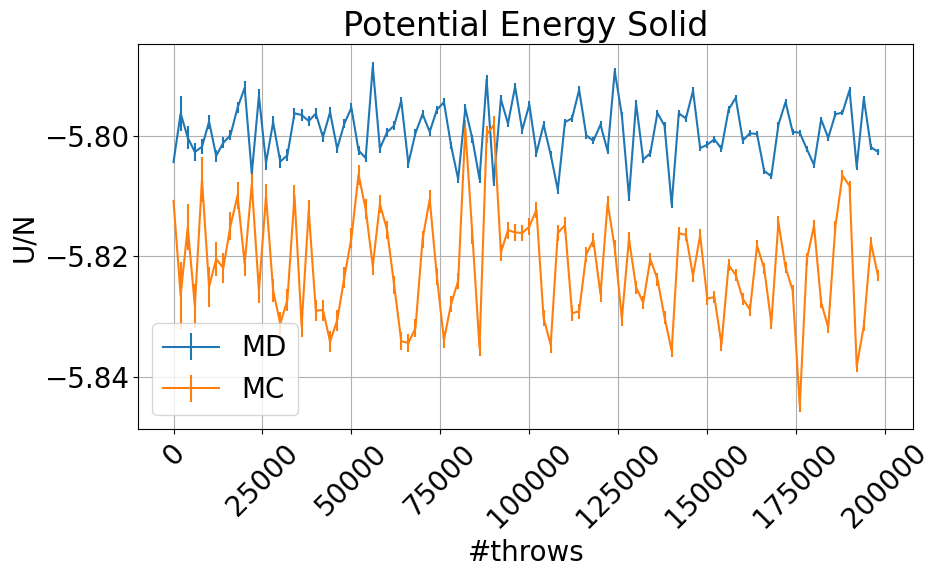

In [161]:
data8 = pd.read_csv('../Esercizio7/output_epot_MD_Solid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
data9 = pd.read_csv('../Esercizio7/output_epot_MC_Solid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])

plt.errorbar(x1,data8["values"],yerr=data8["error"], label="MD")
plt.errorbar(x1,data9["values"],yerr=data9["error"], label="MC")
plt.title('Potential Energy Solid')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.ylabel('U/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

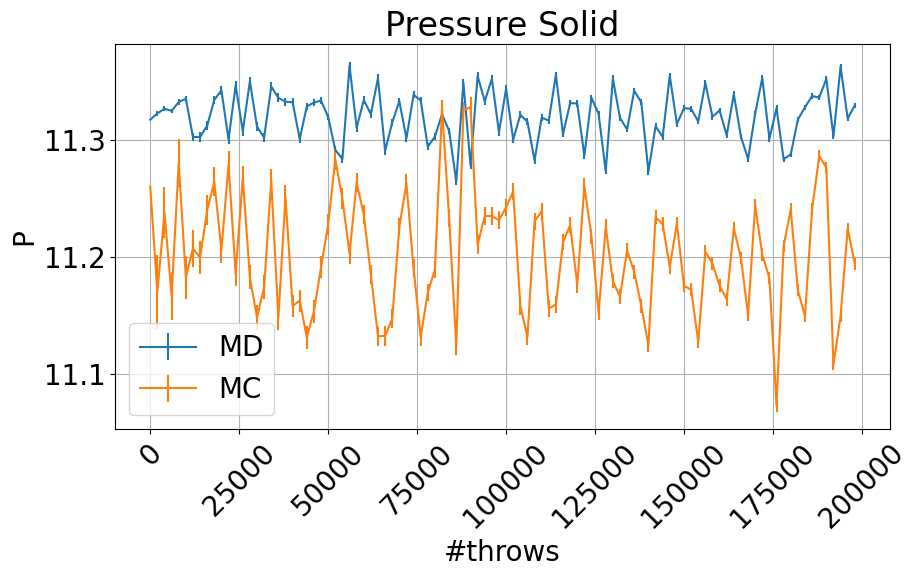

In [162]:
data10 = pd.read_csv('../Esercizio7/output_ptot_MD_Solid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
data11 = pd.read_csv('../Esercizio7/output_ptot_MC_Solid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.errorbar(x1,data10["values"],yerr=data10["error"], label="MD")
plt.errorbar(x1,data11["values"],yerr=data11["error"], label="MC")
plt.title('Pressure Solid')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.ylabel('P')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

## In case of the Solid i tried several temperatures (all oscillating nearly the chosen value) for MD simulation, i couldnt find a values for matching both pressure and potential. 

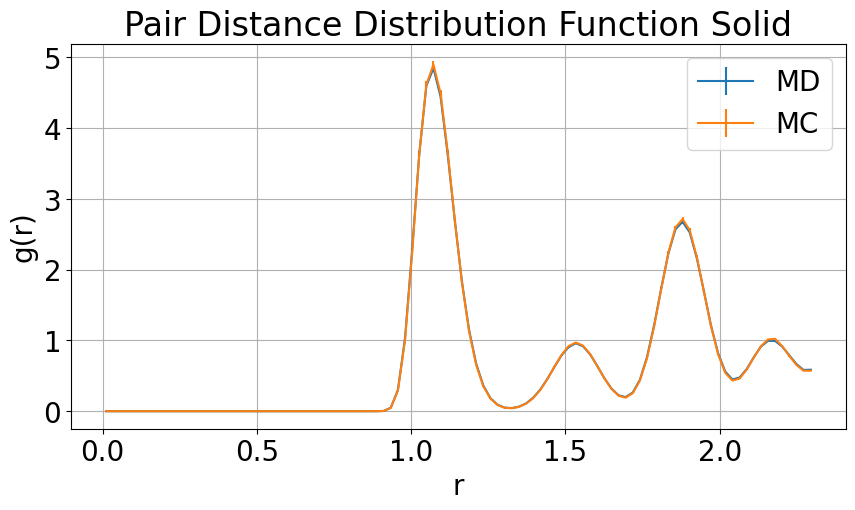

In [77]:
data12 = pd.read_csv('../Esercizio7/output_gr_MD_Solid.dat', sep='\s+', header=None, names=['r', 'g', 'error'])
data13 = pd.read_csv('../Esercizio7/output_gr_MC_Solid.dat', sep='\s+', header=None, names=['r', 'g', 'error'])

plt.errorbar(data12["r"],data12["g"],yerr=data12["error"], label="MD")
plt.errorbar(data13["r"],data13["g"],yerr=data13["error"], label="MC")
plt.title('Pair Distance Distribution Function Solid')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid(True)
plt.show()


## Common plot of pair distance distribution function of a solid; The first peak rappresent the nearest-neighbor distance. This peak rappresents the distance between a the nearest atoms in a solid, this value is the most frequent in solid lattice. The second peak rapprentes the distances between atoms that are not directly adjacent and gives information about spatial ordering beyond the immediate neighbors. As usually the first pick is around the Bohr radius and usually the second pick is around 3/2 of bohr radius. Last the third pick gives information about the next layer of atoms of lattice. The multiple number of picks rappresents a degree of order (or may be correlation in arrangement of atoms at specific distances) but the periodic lattice in a solid suggest the first one.

# Liquid

## In case of liquid the accept ratio for MC simulation if approssimatly 50% which is what we want

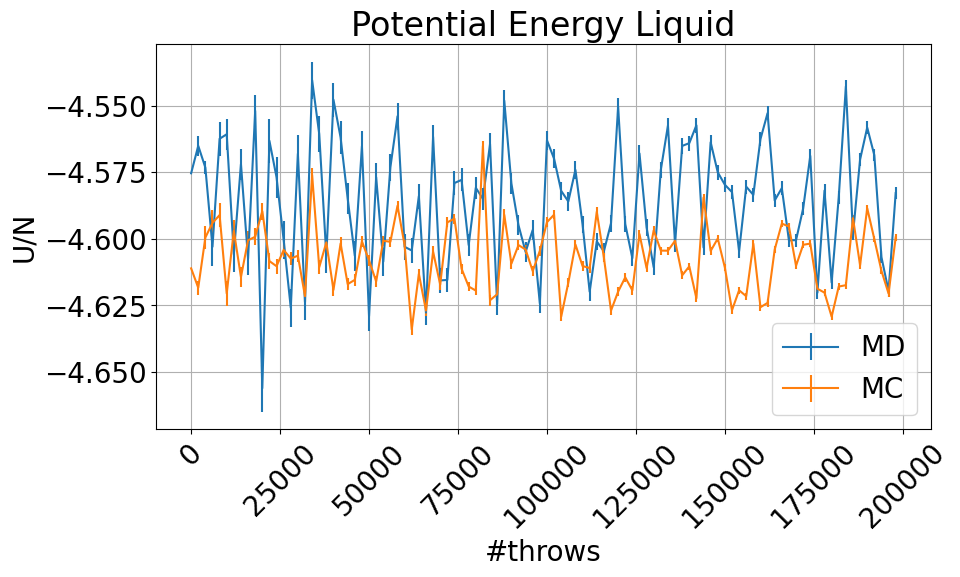

In [148]:
data1 = pd.read_csv('../Esercizio7/output_epot_MD_Liquid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
data2 = pd.read_csv('../Esercizio7/output_epot_MC_Liquid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])

plt.errorbar(x1,data1["values"],yerr=data1["error"], label="MD")
plt.errorbar(x1,data2["values"],yerr=data2["error"], label="MC")
plt.title('Potential Energy Liquid')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.ylabel('U/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

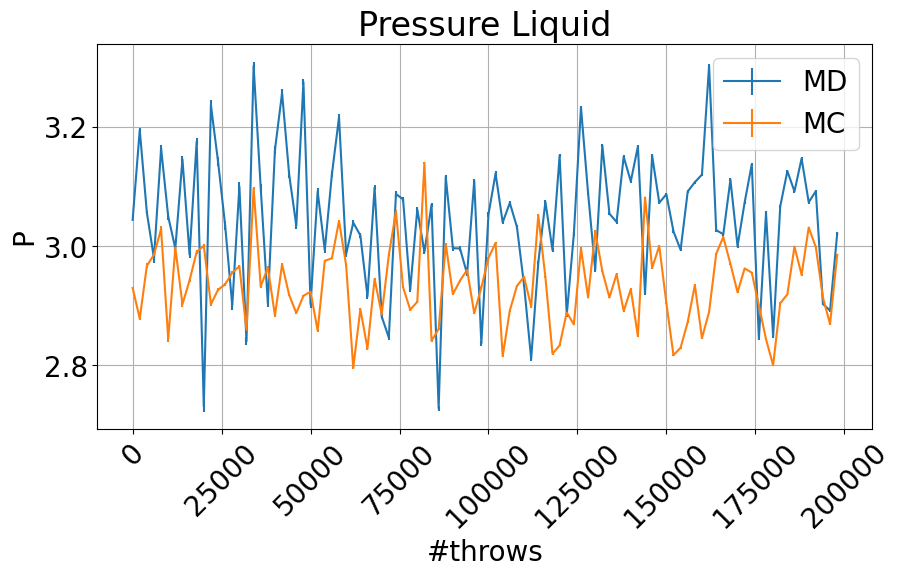

In [149]:
data3 = pd.read_csv('../Esercizio7/output_ptot_MD_Liquid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
data4 = pd.read_csv('../Esercizio7/output_ptot_MC_Liquid.dat', sep='\s+', header=None, names=['values', 'g', 'error'])

plt.errorbar(x1,data3["values"],yerr=data1["error"], label="MD")
plt.errorbar(x1,data4["values"],yerr=data2["error"], label="MC")
plt.title('Pressure Liquid')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.ylabel('P')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

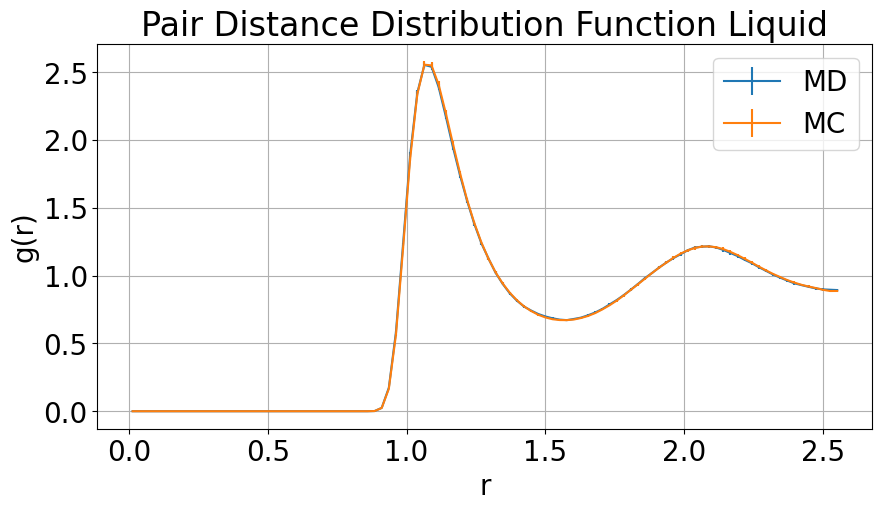

In [44]:
data5 = pd.read_csv('../Esercizio7/output_gr_MD_Liquid.dat', sep='\s+', header=None, names=['r', 'g', 'error'])
data6 = pd.read_csv('../Esercizio7/output_gr_MC_Liquid.dat', sep='\s+', header=None, names=['r', 'g', 'error'])

plt.errorbar(data5["r"],data5["g"],yerr=data5["error"], label="MD")
plt.errorbar(data6["r"],data6["g"],yerr=data6["error"], label="MC")
plt.title('Pair Distance Distribution Function Liquid')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid(True)
plt.show()

## Common pair distance distribution function of a liquid, that rappresent a short range interaction. In contrast to a solid, the PDDF of a liquid is smoother, due to a long-range order.

# Gas

## In case of MC Gas i tried many values of delta in attemp to obtain around 50%, my virtue didnt repay. The better value for delta i obtain is 2.0 which corrispond to a 69% accept ratio; little higher then the expected. 

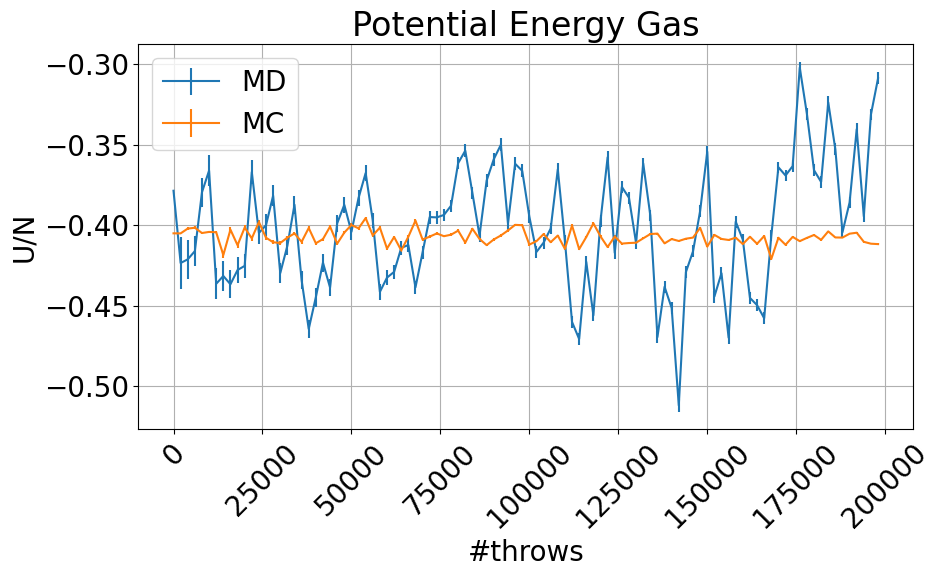

In [153]:
data14 = pd.read_csv('../Esercizio7/output_epot_MD_Gas.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
data15 = pd.read_csv('../Esercizio7/output_epot_MC_Gas.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
plt.errorbar(x1,data14["values"],yerr=data14["error"], label="MD")
plt.errorbar(x1,data15["values"],yerr=data15["error"], label="MC")
plt.title('Potential Energy Gas')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('#throws')
plt.ylabel('U/N')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

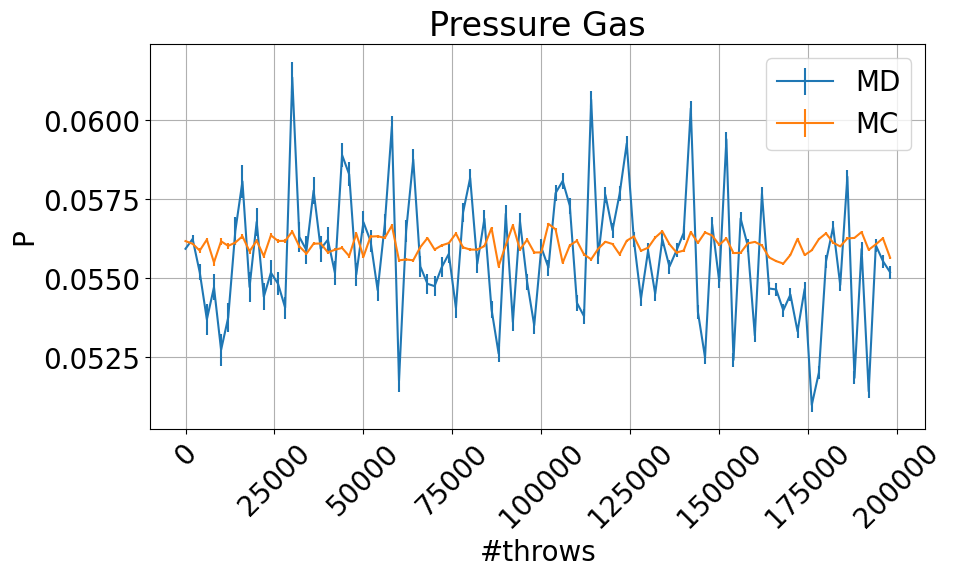

In [154]:
data16 = pd.read_csv('../Esercizio7/output_ptot_MD_Gas.dat', sep='\s+', header=None, names=['values', 'g', 'error'])
data17 = pd.read_csv('../Esercizio7/output_ptot_MC_Gas.dat', sep='\s+', header=None, names=['values', 'g', 'error'])

plt.errorbar(x1,data16["values"],yerr=data16["error"], label="MD")
plt.errorbar(x1,data17["values"],yerr=data17["error"], label="MC")
plt.rcParams["figure.figsize"]=(10,5)
plt.title('Pressure Gas')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('P')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

## The values are overlaped; the values of $$P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$
## in MD simulation the pressure is more oscillating due to the temperature. In MC simulation the temperature its fixed.

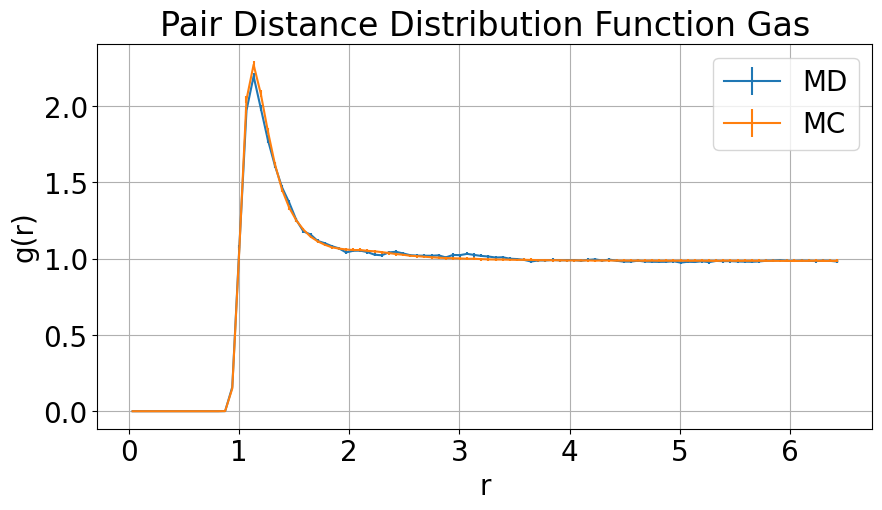

In [152]:
data18 = pd.read_csv('../Esercizio7/output_gr_MD_Gas.dat', sep='\s+', header=None, names=['r', 'g', 'error'])
data19 = pd.read_csv('../Esercizio7/output_gr_MC_Gas.dat', sep='\s+', header=None, names=['r', 'g', 'error'])

plt.errorbar(data18["r"],data18["g"],yerr=data18["error"], label="MD")
plt.errorbar(data19["r"],data19["g"],yerr=data19["error"], label="MC")
plt.title('Pair Distance Distribution Function Gas')
plt.legend()
plt.rcParams["figure.figsize"]=(10,5)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid(True)
plt.show()

## In a typically PDDF of a Gas we should find that there are not sharp peaks. The presence of this peak if maybe due to starting coordinates of the particles in a MD or MC simulations. But the rest of PDDF is the common one for Gas. This is beacuse gases have long-range order but they are more freely.

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded MD/MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$) Tstart=1.55
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)Tstart=2.0
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$) T=0.85 delta 2.0

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>